# **Life Expectancy: EDA**

1.   Data Cleaning
2.   Data Exploration
3.   Feature Engineering
4.   Summary



**Import Dataset and loads**

In [66]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize


In [70]:
df = pd.read_csv('/content/drive/MyDrive/eda3 walter.zip')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

**Getting a Brief Look at the Data**

In [3]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [77]:
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"Hepatitis_B",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [84]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [82]:
y= df["Life_expectancy"]
df1=  df.drop(["Life_expectancy"], axis=1)

categorical= df.select_dtypes(include= "O")
numerical= df.select_dtypes(exclude= "O")

# **EDA**

Non Graphical EDA:

In [74]:
categorical.describe()

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [75]:
round(numerical.describe(),3)

Year  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
count  2938.000          2928.000         2928.000       2938.000  2744.000   
mean   2007.519            69.225          164.796         30.304     4.603   
std       4.614             9.524          124.292        117.927     4.052   
min    2000.000            36.300            1.000          0.000     0.010   
25%    2004.000            63.100           74.000          0.000     0.878   
50%    2008.000            72.100          144.000          3.000     3.755   
75%    2012.000            75.700          228.000         22.000     7.703   
max    2015.000            89.000          723.000       1800.000    17.870   

       percentage expenditure  Hepatitis B    Measles       BMI   \
count                2938.000      2385.00    2938.000  2904.000   
mean                  738.251        80.94    2419.592    38.321   
std                  1987.915        25.07   11467.272    20.044   
min                     0.000         1.00       0.000     1.000   
25%                     4.685        77.00       0.000    19.300   
50%                    64.913        92.00      17.000    43.500   
75%                   441.534        97.00     360.250    56.200   
max                 19479.912        99.00  212183.000    87.300   

       under-five deaths      Polio  Total expenditure  Diphtheria   \
count            2938.000  2919.000           2712.000     2919.000   
mean               42.036    82.550              5.938       82.324   
std               160.446    23.428              2.498       23.717   
min                 0.000     3.000              0.370        2.000   
25%                 0.000    78.000              4.260       78.000   
50%                 4.000    93.000              5.755       93.000   
75%                28.000    97.000              7.492       97.000   
max              2500.000    99.000             17.600       99.000   

        HIV/AIDS         GDP    Population   thinness  1-19 years  \
count   2938.000    2490.000  2.286000e+03                2904.00   
mean       1.742    7483.158  1.275338e+07                   4.84   
std        5.078   14270.169  6.101210e+07                   4.42   
min        0.100       1.681  3.400000e+01                   0.10   
25%        0.100     463.936  1.957932e+05                   1.60   
50%        0.100    1766.948  1.386542e+06                   3.30   
75%        0.800    5910.806  7.420359e+06                   7.20   
max       50.600  119172.742  1.293859e+09                  27.70   

        thinness 5-9 years  Income composition of resources  Schooling  
count             2904.000                         2771.000   2775.000  
mean                 4.870                            0.628     11.993  
std                  4.509                            0.211      3.359  
min                  0.100                            0.000      0.000  
25%                  1.500                            0.493     10.100  
50%                  3.300                            0.677     12.300  
75%                  7.200                            0.779     14.300  
max                 28.600                            0.948     20.700

Countries Vs Life expectancy

In [86]:
print("Top 10 countries with most life expectancy")
print('=' *50)
print(df.groupby(['Country']).Life_expectancy.mean().sort_values(ascending=False).head(10))
print("Top 10 countries with least life expectancy")
print('=' *50)
print(df.groupby(['Country']).Life_expectancy.mean().sort_values(ascending=True).head(10))

Top 10 countries with most life expectancy
Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life_expectancy, dtype: float64
Top 10 countries with least life expectancy
Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life_expectancy, dtype: float64


Countries Vs Population

In [87]:
print("="*50)
print("Top 10 Countries with Most Population")
print("="*50)
print(df.groupby("Country").Population.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Least Population")
print("="*50)
print(df.groupby("Country").Population.mean().sort_values(ascending =True).head(10))

Top 10 Countries with Most Population
Country
India                 4.214677e+08
Indonesia             1.165553e+08
Brazil                8.812807e+07
Nigeria               7.087700e+07
Pakistan              6.902796e+07
Russian Federation    5.976209e+07
Ethiopia              4.395076e+07
Bangladesh            4.298516e+07
Germany               3.875735e+07
Philippines           3.726540e+07
Name: Population, dtype: float64
Top 10 Countries with Least Population
Country
Palau           292.0000
Tuvalu         1819.0000
Maldives       3334.2500
Georgia       10152.3750
Sri Lanka     10844.8125
Tonga         26589.8125
Israel        27862.8750
Kiribati      35919.9375
Seychelles    61543.8125
Japan         97384.0625
Name: Population, dtype: float64


In [88]:
print("="*50)
print("Top 10 Countries with Most Population")
print("="*50)
print(df.groupby("Country").GDP.mean().sort_values(ascending =False).head(10))
print("="*50)
print("Top 10 Countries with Least Population")
print("="*50)
print(df.groupby("Country").GDP.mean().sort_values(ascending =True).head(10))

Top 10 Countries with Most Population
Country
Switzerland    57362.874601
Luxembourg     53257.012741
Qatar          40748.444104
Netherlands    34964.719797
Australia      34637.565047
Ireland        33835.272005
Austria        33827.476309
Denmark        33067.407916
Singapore      32790.105907
Kuwait         31914.378339
Name: GDP, dtype: float64
Top 10 Countries with Least Population
Country
Nauru           136.183210
Burundi         137.815321
Malawi          237.504042
Liberia         246.281748
Eritrea         259.395356
Niger           259.782441
Ethiopia        264.970950
Sierra Leone    271.505561
Senegal         274.611166
Guinea          279.464798
Name: GDP, dtype: float64


# **Data Cleaning**
**Checking Missing Values**

In [71]:
def checkna(df):
    missing_values= df.isna().sum().reset_index()
    missing_values.columns= ["Features", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(df)*100,2)
    return missing_values[missing_values.Missing_Values > 0 ]

In [72]:
checkna(df)

Features  Missing_Values  Missing_Percent
3                  Life expectancy               10             0.34
4                   Adult Mortality              10             0.34
6                           Alcohol             194             6.60
8                       Hepatitis B             553            18.82
10                             BMI               34             1.16
12                            Polio              19             0.65
13                Total expenditure             226             7.69
14                      Diphtheria               19             0.65
16                              GDP             448            15.25
17                       Population             652            22.19
18             thinness  1-19 years              34             1.16
19               thinness 5-9 years              34             1.16
20  Income composition of resources             167             5.68
21                        Schooling             163             5.55

**Missing values treatment**

In [8]:
a= df['Population'].median()
df['Population'].fillna(a,inplace=True)

c = df['Adult_mortality'].median()
df['Adult_mortality'].fillna(c,inplace = True)

d = df['Alcohol'].median()
df['Alcohol'].fillna(d,inplace=True)

e = df['Hepatitis_B'].median()
df['Hepatitis_B'].fillna(e,inplace=True)

f = df['BMI'].median()
df['BMI'].fillna(f,inplace=True)

g = df['Polio'].median()
df['Polio'].fillna(g,inplace=True)

h = df['Total_expenditure'].median()
df['Total_expenditure'].fillna(h,inplace=True)

i= df['Diphtheria'].median()
df['Diphtheria'].fillna(i,inplace=True)

j = df['GDP'].median()
df['GDP'].fillna(j,inplace=True)

k = df['Thinness_5-9_years'].median()
df['Thinness_5-9_years'].fillna(k,inplace=True)

l = df['Thinness_1-19_years'].median()
df['Thinness_1-19_years'].fillna(l,inplace=True)

m = df['Income_composition_of_resources'].median()
df['Income_composition_of_resources'].fillna(m,inplace=True)

n = df['Schooling'].median()
df['Schooling'].fillna(n,inplace=True)

o = df['Life_expectancy'].median()
df['Life_expectancy'].fillna(o,inplace=True)

In [9]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_mortality                  2938 non-null   float64
 5   Infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  Under_five_deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
fig=px.violin(df,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

In [19]:
df.groupby(['Status'])['Life_expectancy'].mean()

Status
Developed     79.197852
Developing    67.132028
Name: Life_expectancy, dtype: float64

Life expectancy as our dependent variable has similar trends for both developed and developing countries. Two life expectancy indices have a persistent increase over time. However, the expectancy for developed countries is 10 years higher than the developing countries..

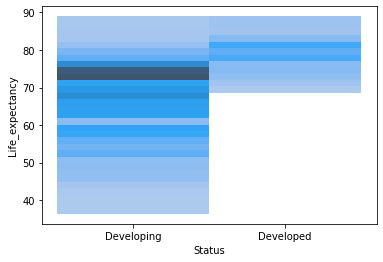

In [50]:
sns.histplot(data=df,x='Status',y='Life_expectancy')
plt.show()

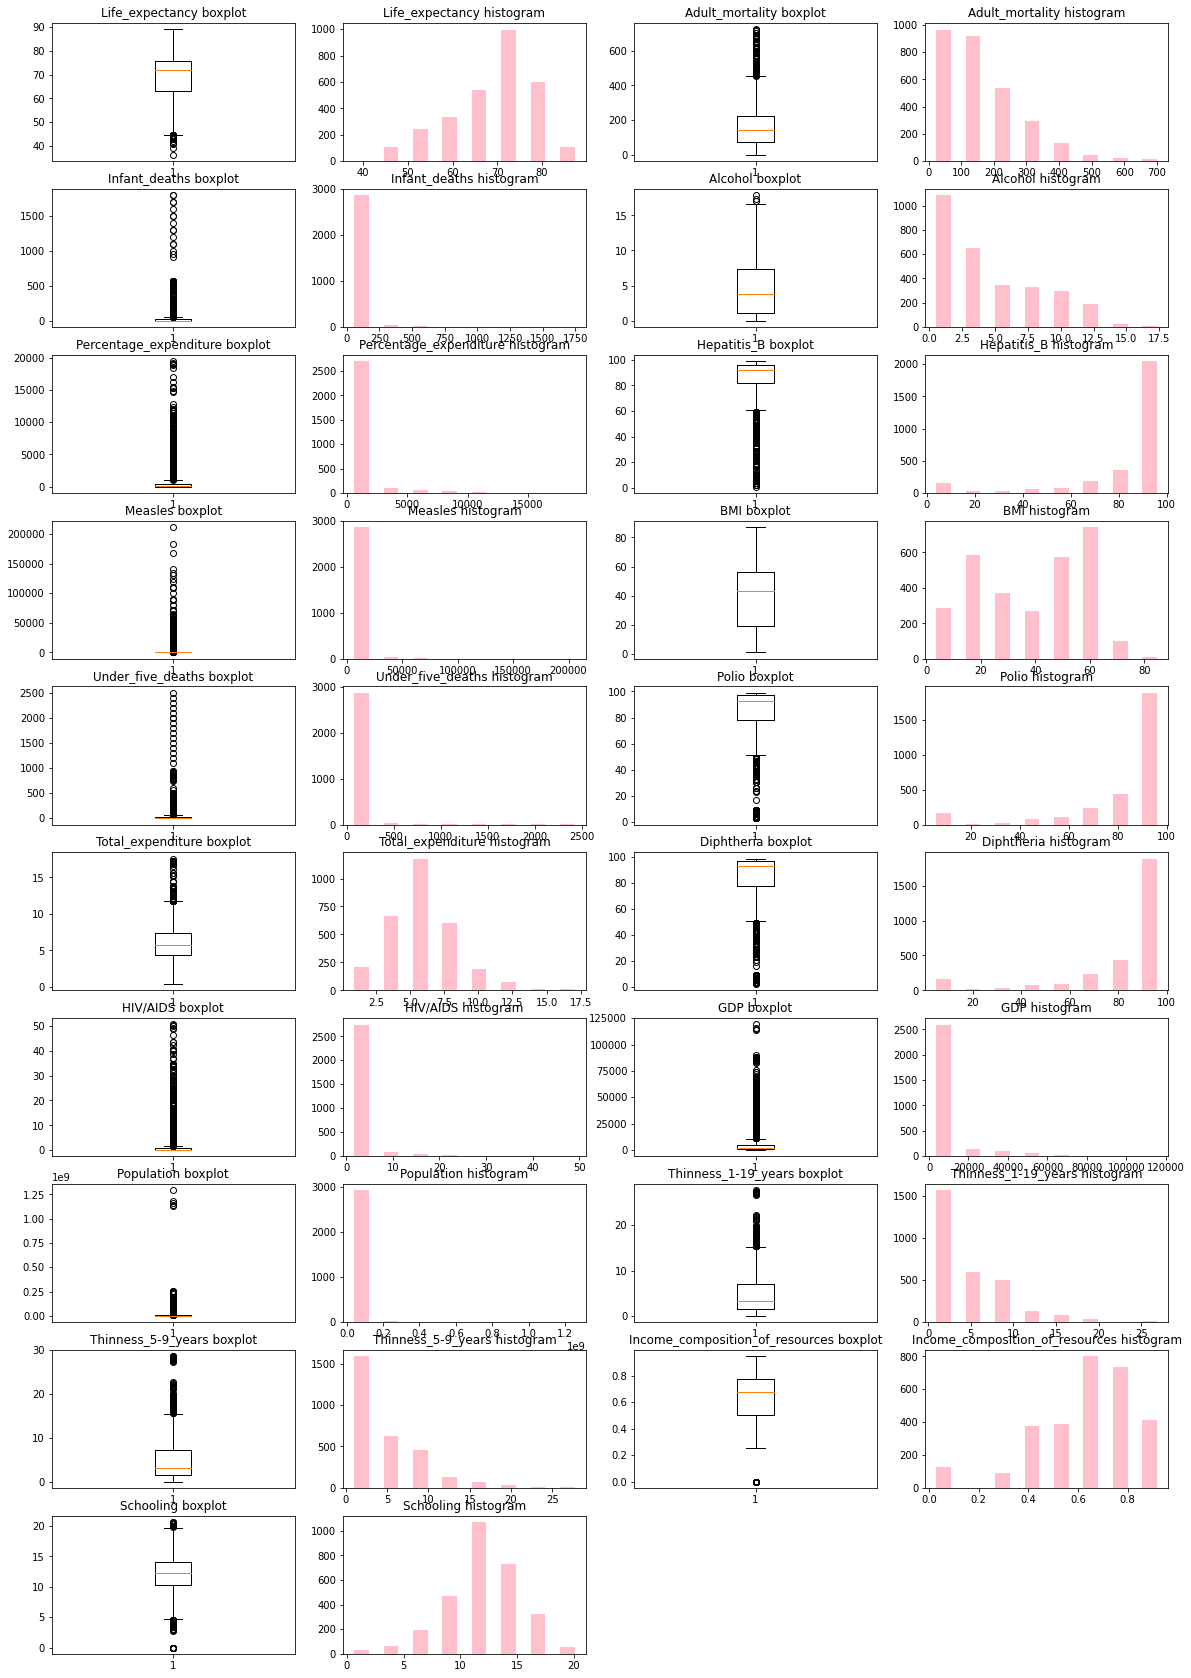

In [17]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(20, 30))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(10, 4, i)
        plt.hist(data[col],bins=8,rwidth=0.5,color='pink')
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

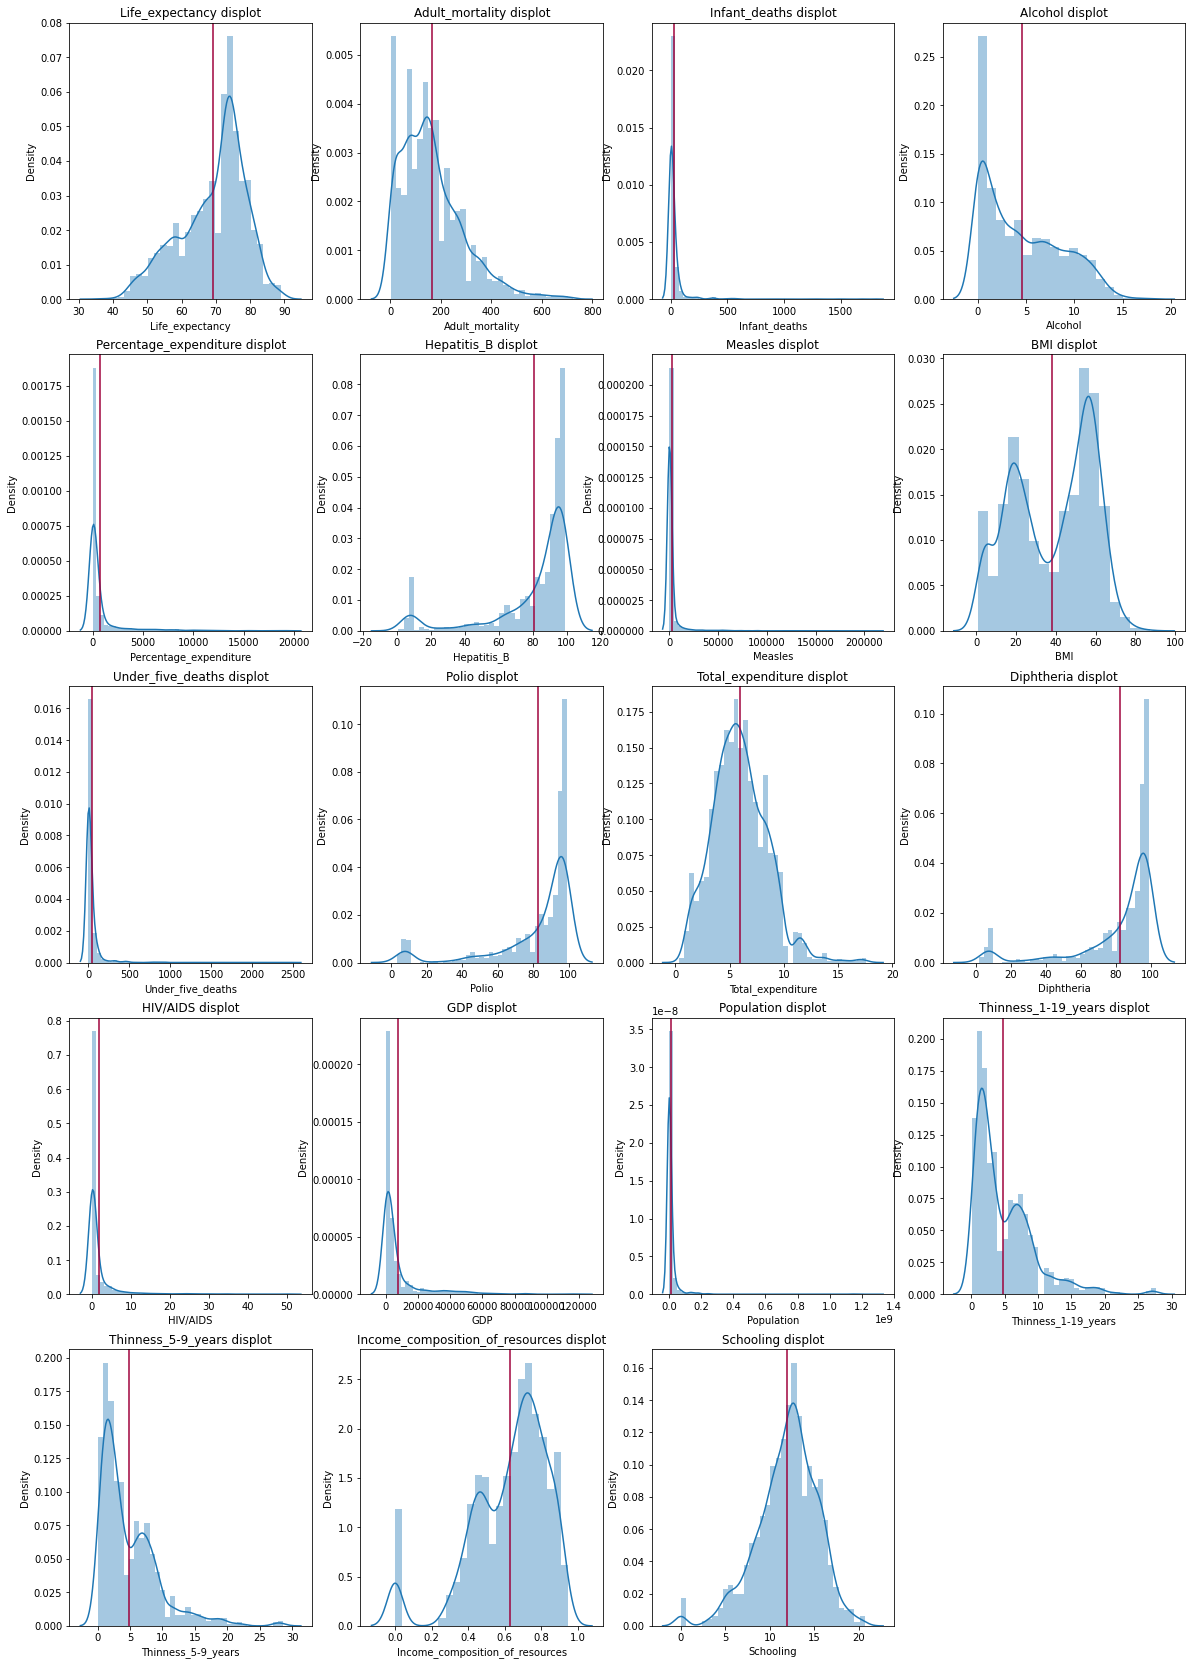

In [104]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(20, 60))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(10, 4, i)
        sns.distplot(data[col])
        plt.title('{} displot'.format(col))
        plt.axvline(df.loc[:,col].mean(), color=('xkcd:cranberry'))

plt.tight_layout()
plt.show()
outliers_visual(df)

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

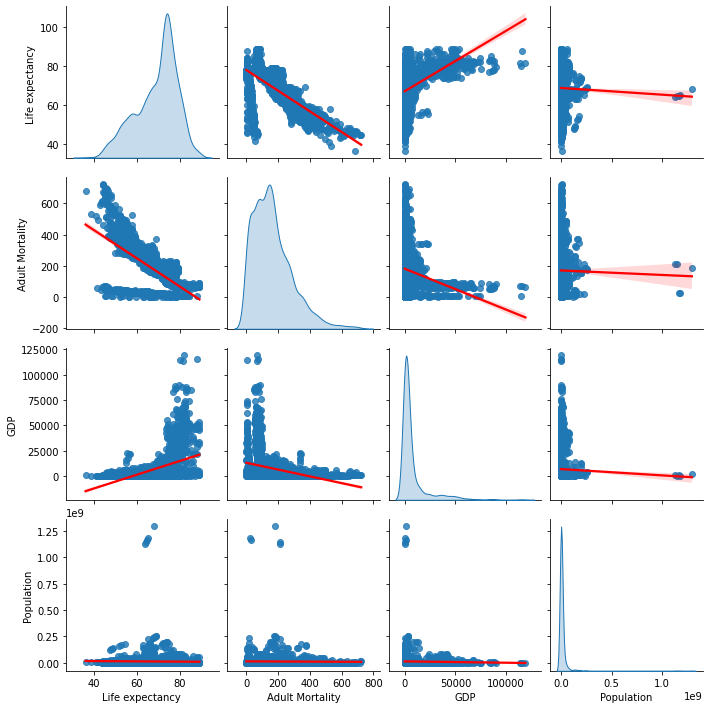

In [ ]:
cols_to_plot1 = ['Life expectancy ','Adult Mortality','GDP','Population',]
sns.pairplot(df[cols_to_plot1],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

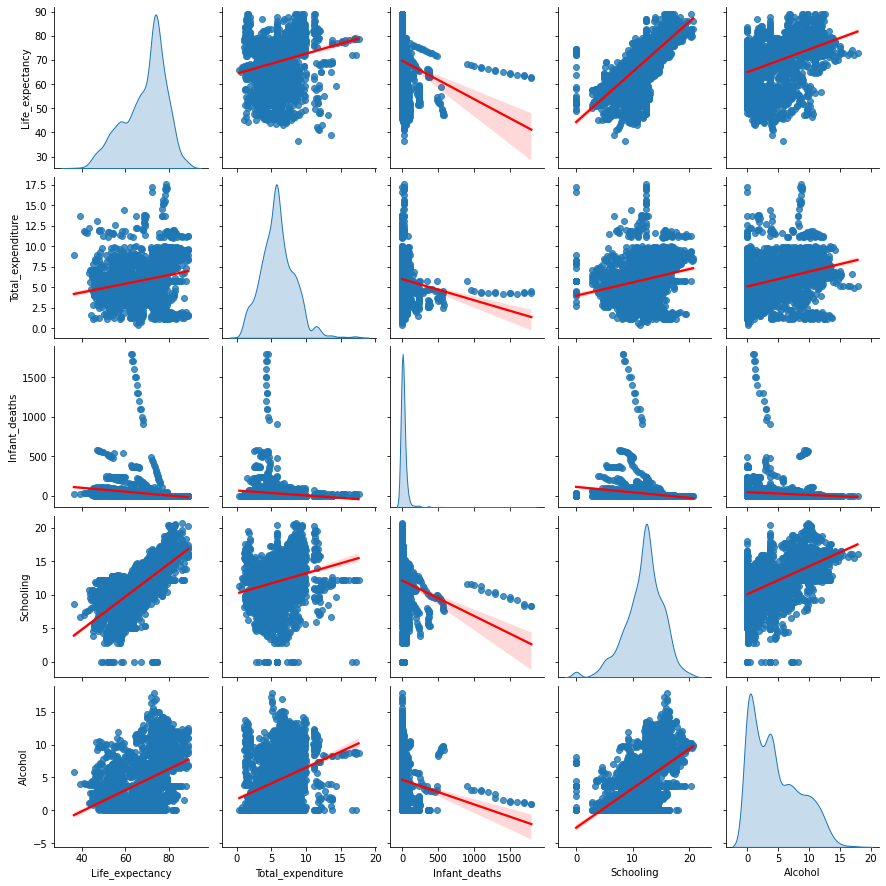

In [59]:
cols_to_plot2 = ['Life_expectancy','Total_expenditure', 'Infant_deaths', 'Schooling','Alcohol']
sns.pairplot(df[cols_to_plot2],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

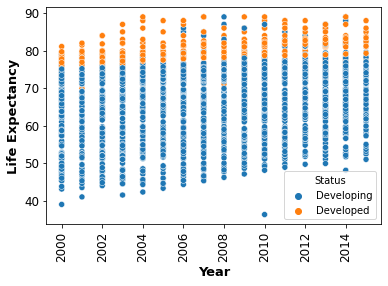

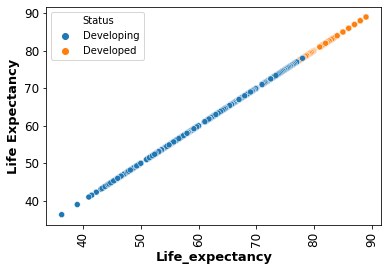

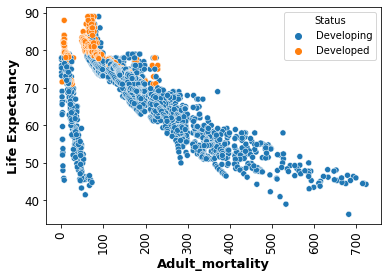

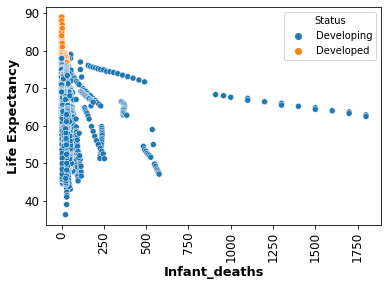

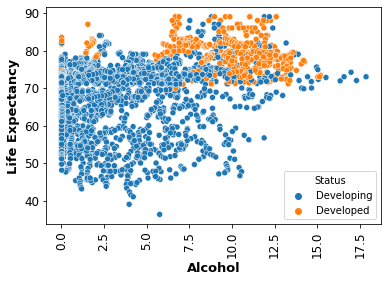

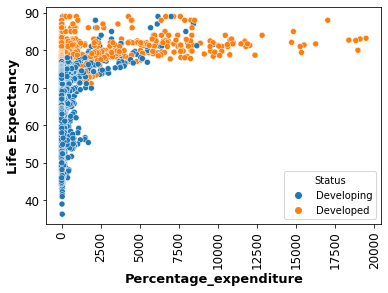

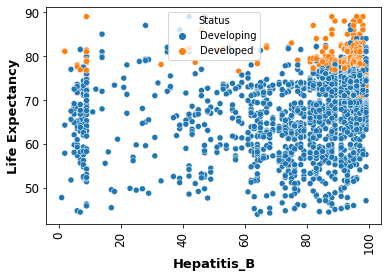

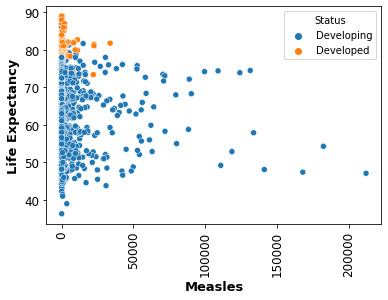

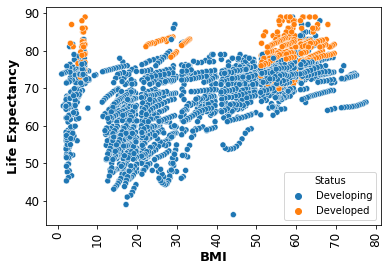

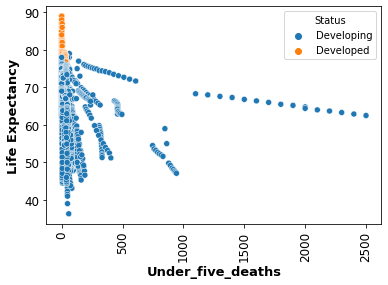

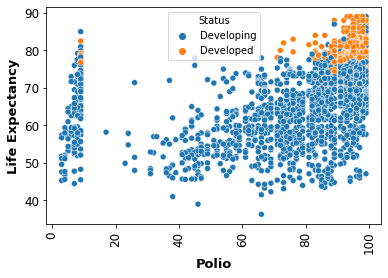

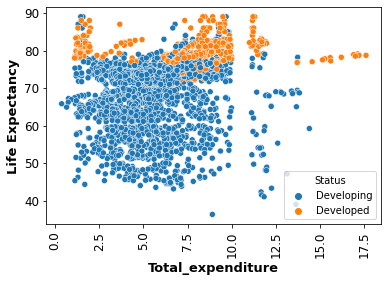

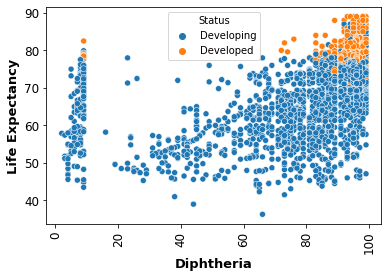

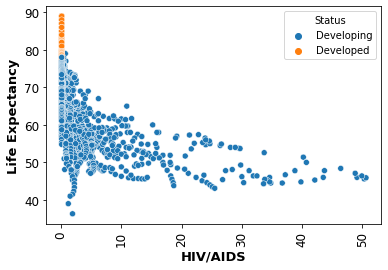

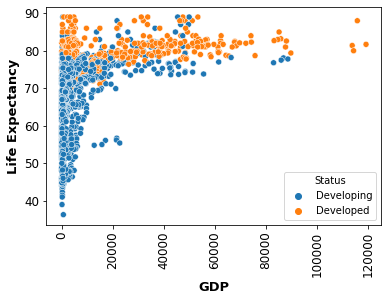

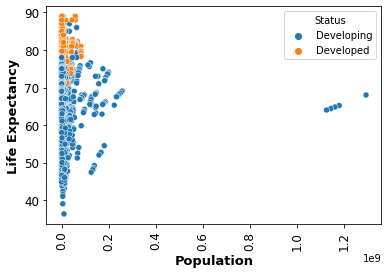

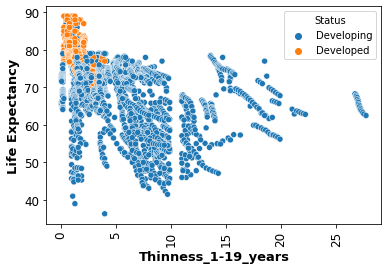

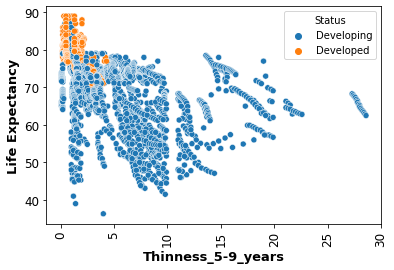

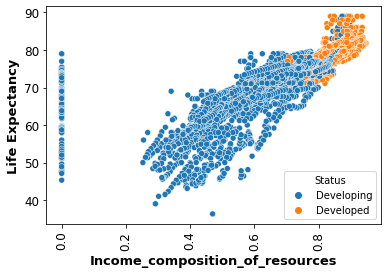

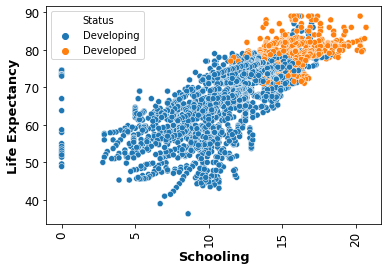

In [89]:
for feature in numerical.columns:
    sns.scatterplot(x= numerical[feature], y= y, hue= categorical.Status)
    plt.xticks(rotation=90, fontsize= 12)
    plt.yticks(fontsize=12)
    plt.ylabel("Life Expectancy", fontsize= 13, fontweight="bold", name= "helvetica")
    plt.xlabel(feature, fontsize=13, fontweight="bold")
    plt.show()

1. Alcohol seems to have a stable trends for all countries. However, alcohol consumption in developed countries have a much higher value than developing country, and countries classified as high and upper middle income have a higher alcohol consumption value than lower middle and low income.

2.  polio,Diphtheria vaccination coverage seems to indicate a high life expectancy when vaccination coverage is high. 

In [93]:
fig1=px.scatter(df.sort_values(by='Year'),x='Life_expectancy',y='Schooling',color='Country',size='Year',animation_frame='Year',animation_group='Country',template='plotly_dark',
           title='<b> Life_expectancy Vs Schooling')
fig1.show()

Life expectancy increases as more people completing schooling.

**Feature Engineering**

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



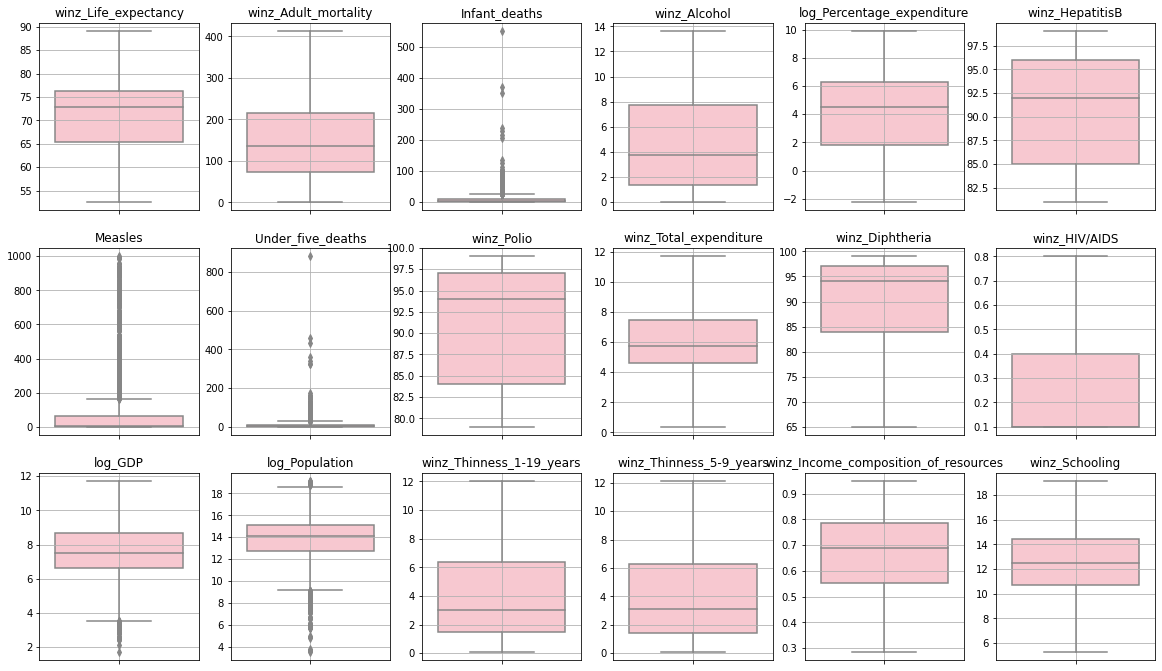

In [ ]:
df = df[df['Infant_deaths'] < 1001]
df = df[df['Measles'] < 1001]
df = df[df['Under_five_deaths'] < 1001]

df.drop(['BMI'], axis=1, inplace=True)
df['log_Percentage_expenditure'] = np.log(df['Percentage_expenditure'])
df['log_Population'] = np.log(df['Population'])
df['log_GDP'] = np.log(df['GDP'])
df = df.replace([np.inf, -np.inf], 0)
df['log_Percentage_expenditure']

df['winz_Life_expectancy'] = winsorize(df['Life_expectancy'], (0.05,0))
df['winz_Adult_mortality'] = winsorize(df['Adult_mortality'], (0,0.04))
df['winz_Alcohol'] = winsorize(df['Alcohol'], (0.0,0.01))
df['winz_HepatitisB'] = winsorize(df['Hepatitis_B'], (0.20,0.0))
df['winz_Polio'] = winsorize(df['Polio'], (0.20,0.0))
df['winz_Total_expenditure'] = winsorize(df['Total_expenditure'], (0.0,0.02))
df['winz_Diphtheria'] = winsorize(df['Diphtheria'], (0.11,0.0))
df['winz_HIV/AIDS'] = winsorize(df['HIV/AIDS'], (0.0,0.21))
df['winz_Thinness_1-19_years'] = winsorize(df['Thinness_1-19_years'], (0.0,0.04))
df['winz_Thinness_5-9_years'] = winsorize(df['Thinness_5-9_years'], (0.0,0.04))
df['winz_Income_composition_of_resources'] = winsorize(df['Income_composition_of_resources'], (0.05,0.0))
df['winz_Schooling'] = winsorize(df['Schooling'], (0.03,0.01))

col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'Infant_deaths':3,'winz_Alcohol':4,
            'log_Percentage_expenditure':5,'winz_HepatitisB':6,'Measles':7,'Under_five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_GDP':13,'log_Population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}


fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = df[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

The average age of developed countries is 79 years and that of daveloping countries is 67 years. 

In [ ]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

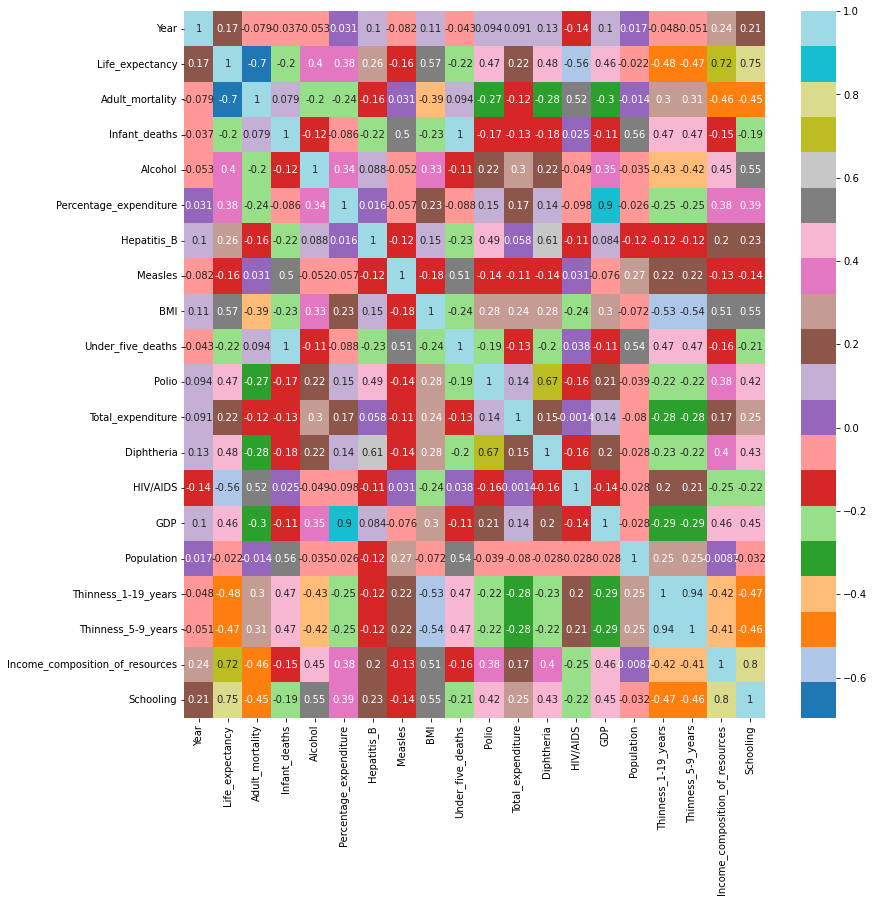

In [102]:
plt.figure(figsize=(13, 13))
df.corr()
sns.heatmap(df.corr(),annot=True,cmap='tab20')
plt.show()

1. Heat map shows that adult mortality, life expectancy are very correlated.Adult mortality and life expectancy are negatively correlated.

2.  Life expectancy is directly correlated to infant mortality and mortality for children from age 1 to 20.

3.  Life expectancy and income are positively correlated increases as income composition of resources increases.

In [103]:
life_exp = df[['Year','Country','Status','winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_Hepatitis B','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']]
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

KeyError: ignored